# Data exploration

## Objectives
 - Explore the heart.csv dataset and analyze if there is any correlation between the variables

## Inputs
- /workspace/Heart_attack_risk/outputs/datasets/collection/heart.csv

## Outputs
- Have an overview of the feature and check which correlates the most

---

## Setting working Directory
The steps below allow to set heart_attack risk as the new working directory

- get current directory and print it


In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heart_attack_risk/jupyer_notebooks'

- set new working directory as parent of the previous current directory
- As a result heart_attack_risk is the new working directory  

In [3]:
os.chdir(os.path.dirname(current_dir))


## Load dataset

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/heart.csv"))
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


## List of variables
**Age** : The age of the indvidual  [years]

**Sex** : The biological sex of the individual [M: Male, F: Female]

**ChestPainType** : Chest Pain type
- TA: typical angina
- ATA atypical angina
- NAP: non-anginal pain
- ASY: asymptomatic

**RestingBP** : Resting blood pressure (in mm Hg)

**Cholesterol** : serum cholesterol [mm/dl]

**FastingBS** :  fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

**RestingECG** :  resting electrocardiogram results:
- Normal: Normal
- ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

**MaxHR** : maximum heart rate achieved [Numeric value between 60 and 202]

**ExerciseAngina**:  exercise-induced angina [Y: Yes, N: No]

**Oldpeak**: Oldpeak refers to the ST segment depression observed on an electrocardiogram (ECG) during exercise.

**ST_slope**: The slope of the ST segment indicates how the ST segment behaves during exercise.
It is categorized into three levels:

- Up: upsloping, 
- Flat: flat, 
- Down: downsloping

**HeartDisease** : [1: heart disease, 0: Normal]

## Data exploration

Analyzing variables distribution, missing data and relevance in business context

In [5]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Correlation study

- Converting categorical variable into numerical

In [5]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(3)

(918, 21)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,Sex_F,ChestPainType_ATA,...,ChestPainType_ASY,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_LVH,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
1,49,160,180,0,156,1.0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0




- Spearman coefficient assesses the monotonic relationship between variables

In [6]:
corr_spearman = df_ohe.corr(method='spearman')['HeartDisease'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

ST_Slope_Up         -0.622164
ST_Slope_Flat        0.554134
ChestPainType_ASY    0.516716
ExerciseAngina_N    -0.494282
ExerciseAngina_Y     0.494282
Oldpeak              0.419046
MaxHR               -0.404827
ChestPainType_ATA   -0.401924
Sex_M                0.305445
Sex_F               -0.305445
Name: HeartDisease, dtype: float64

- ST_Slope, ChestPainType, Exercise angina(exng), oldpeak and maximum heart rate are the variables which correlates the most according to the spearman coefficient

- Pearson coefficient assesses the linear relationship between two variables

In [7]:
corr_pearson = df_ohe.corr(method='pearson')['HeartDisease'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

ST_Slope_Up         -0.622164
ST_Slope_Flat        0.554134
ChestPainType_ASY    0.516716
ExerciseAngina_N    -0.494282
ExerciseAngina_Y     0.494282
Oldpeak              0.403951
ChestPainType_ATA   -0.401924
MaxHR               -0.400421
Sex_M                0.305445
Sex_F               -0.305445
Name: HeartDisease, dtype: float64

- ST_Slope, ChestPainType, Exercise angina(exng), oldpeak and maximum heart rate are the variables which correlates the most according to the spearman coefficient

- Both Spearman and Pearson coefficient highlight the same variables as those which correlates best with the target variable HeartDisease

- If we group the categorical variables separated by the OneHotEncoder, the 5 variables which correlates the most with the target(for both coefficients Spearman and Pearson) are:
**ST_Slope**, **ChestPainType**, **ExerciseAngin**, **Oldpeak**, and **MaxHR**

In [8]:
encoded_vars_to_study = []
correlations_dataframes = [corr_pearson, corr_spearman]
for data in correlations_dataframes:
    for var in data.keys():
        first_n_letters = var[:3]
        if not any(first_n_letters in col for col in encoded_vars_to_study):
            encoded_vars_to_study.append(var)
encoded_vars_to_study

['ST_Slope_Up',
 'ChestPainType_ASY',
 'ExerciseAngina_N',
 'Oldpeak',
 'MaxHR',
 'Sex_M']

In [9]:
vars_to_study = ['ST_Slope', 'ChestPainType', 'ExerciseAngina', 'Oldpeak', 'MaxHR']
vars_to_study

['ST_Slope', 'ChestPainType', 'ExerciseAngina', 'Oldpeak', 'MaxHR']

## Exploratory Data Analysis (EDA)

- Build a dataframe including only the most important variables


In [10]:
df_eda = df.filter(vars_to_study + ['HeartDisease'])
df_eda.head(3)

,ST_Slope,ChestPainType,ExerciseAngina,Oldpeak,MaxHR,HeartDisease
0,Up,ATA,N,0.0,172,0
1,Flat,NAP,N,1.0,156,1
2,Up,ATA,N,0.0,98,0


- I rename the catergorical variables to make plot below easier to read


In [11]:
heart_disease_map = {1: 'Risk', 0: 'No risk'}
chest_pain_map = {'ASY': 'Asymptomatic', 'NAP': 'Non Anginal Pain', 'ATA': 'Atypical Angina', 'TA': 'Typical Angina'}
exercise_angina_map = {'N': 'No Angina', 'Y': 'Angina'}


df_eda['HeartDisease'] = df_eda['HeartDisease'].map(heart_disease_map)
df_eda['ChestPainType'] = df_eda['ChestPainType'].map(chest_pain_map)
df_eda['ExerciseAngina'] = df_eda['ExerciseAngina'].map(exercise_angina_map)

### Variables Distribution by Heart Attack risk

- plot the distribution (numerical and categorical) coloured by heart attack risk

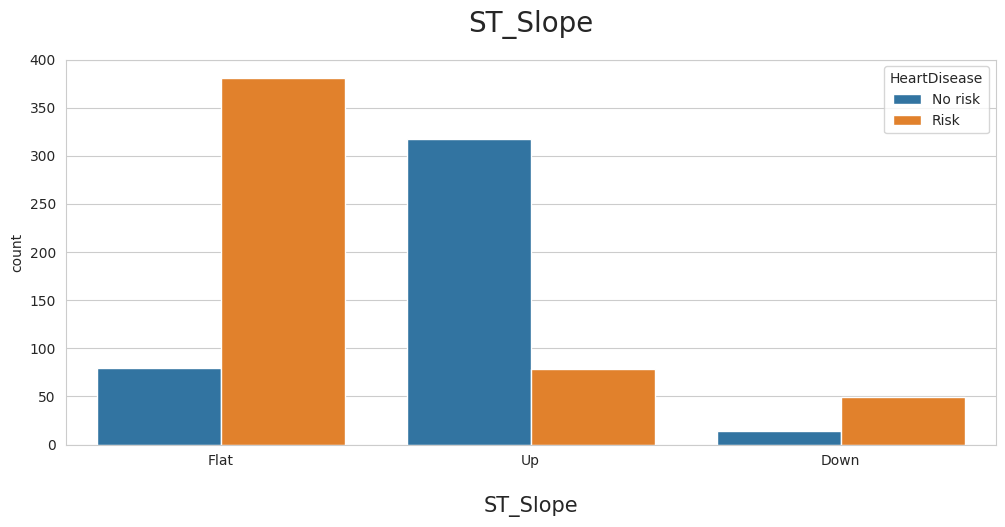

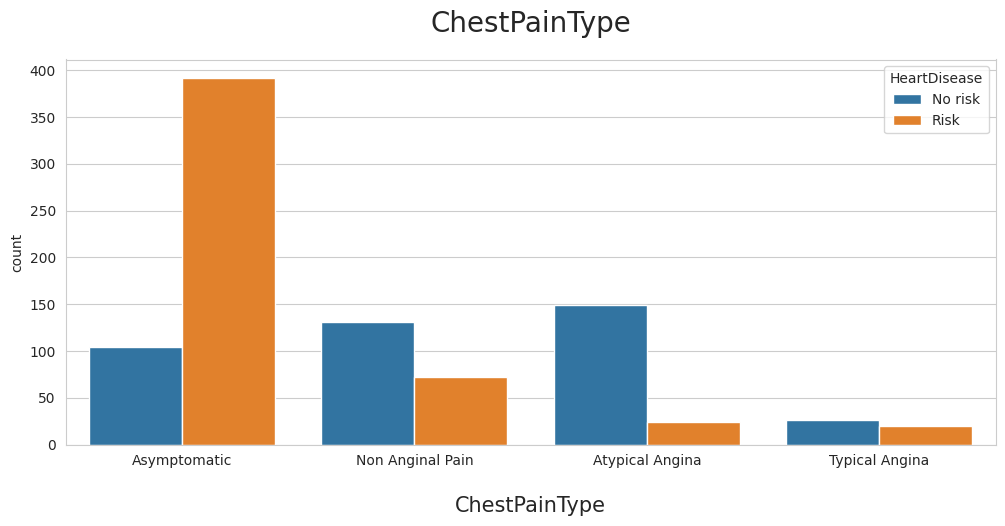

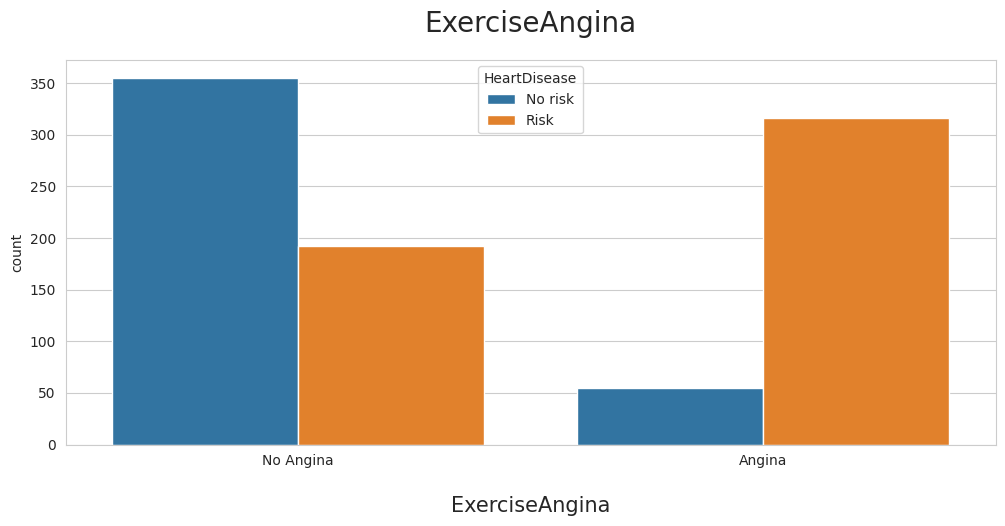

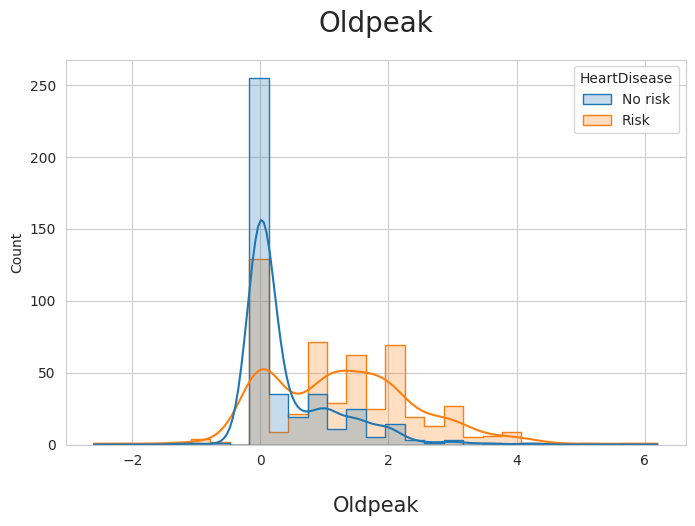

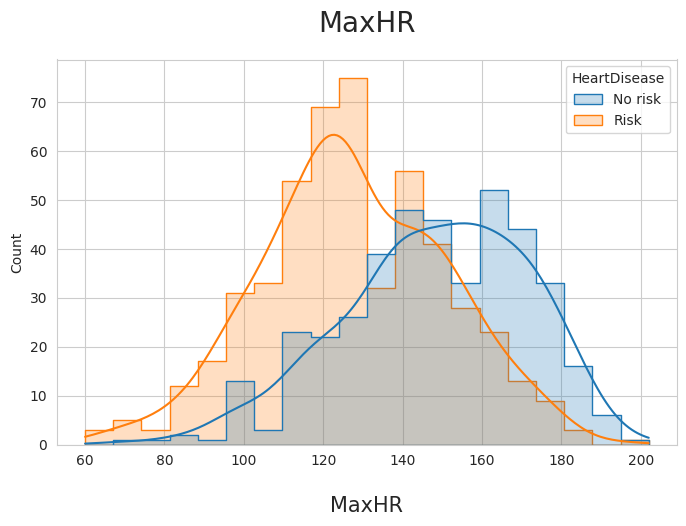

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var, order=df[col].value_counts().index)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.gca().set_xlabel(col, fontsize=15, labelpad=20)
    plt.show()


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.gca().set_xlabel(col, fontsize=15, labelpad=20)
    plt.show()


target_var = 'HeartDisease'
for col in vars_to_study:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")
    

## Correlation and PPS Analysis


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype="bool")
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype="bool")
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

Calculate Correlations and Power Predictive Score



In [14]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)


PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  132.0  0.056  0.111  0.0  0.0  0.0  0.052  0.532


Display Heatmaps plot



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



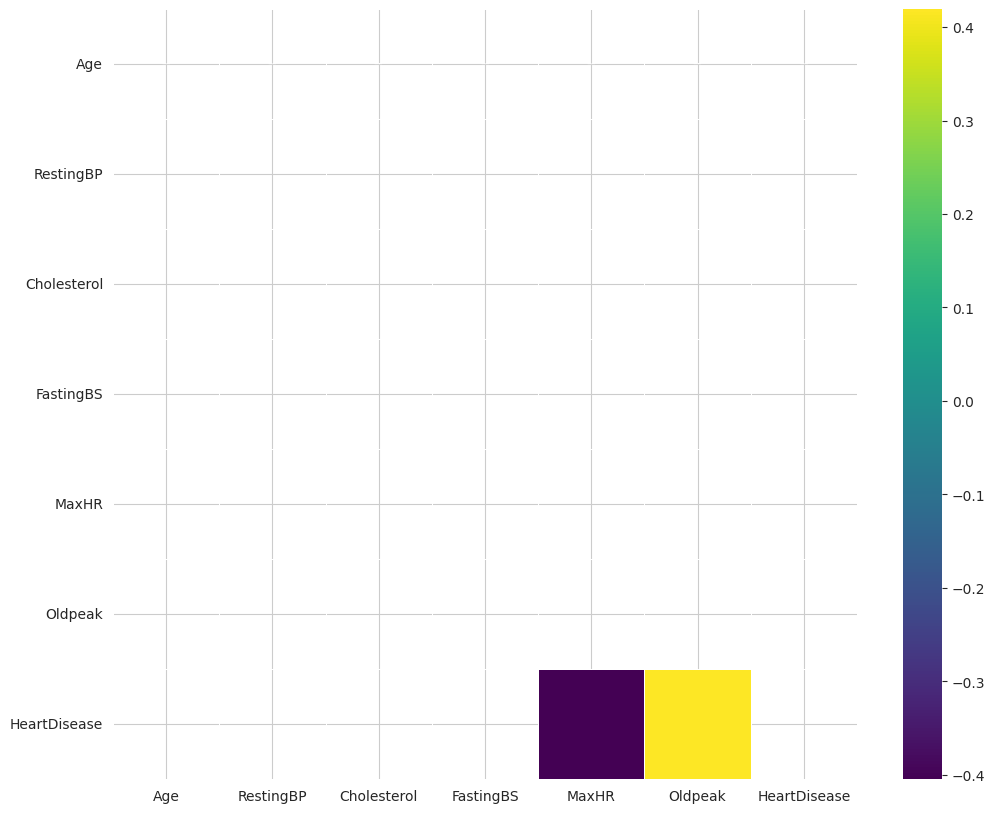



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



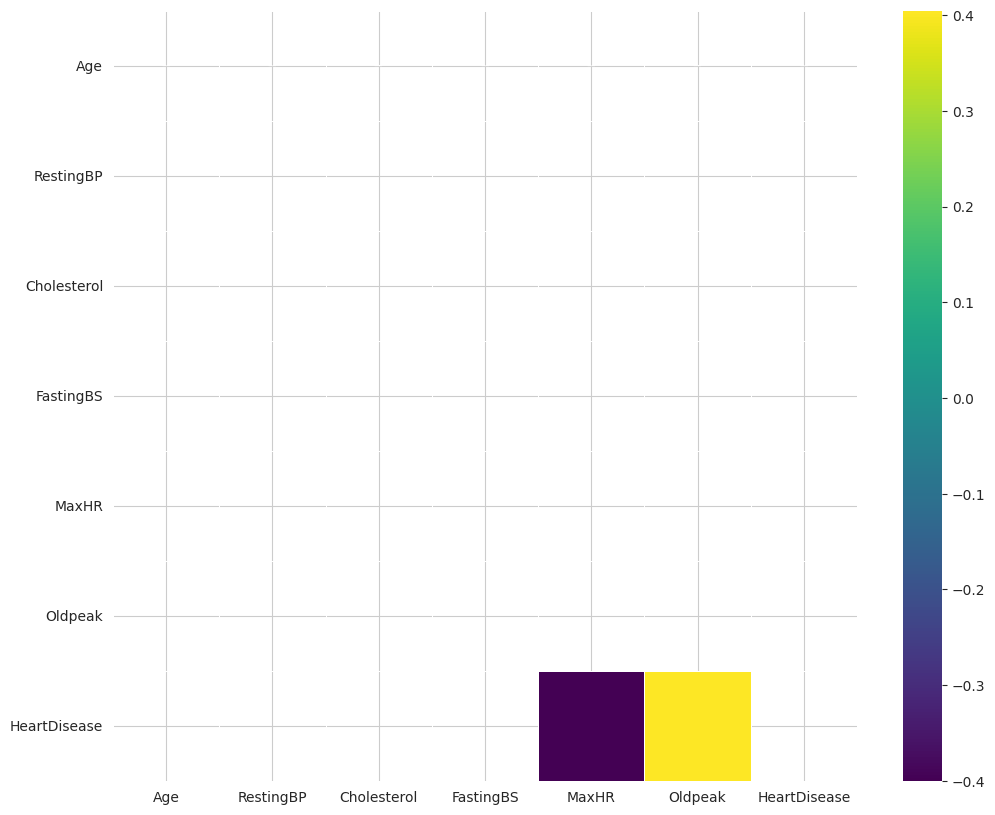



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



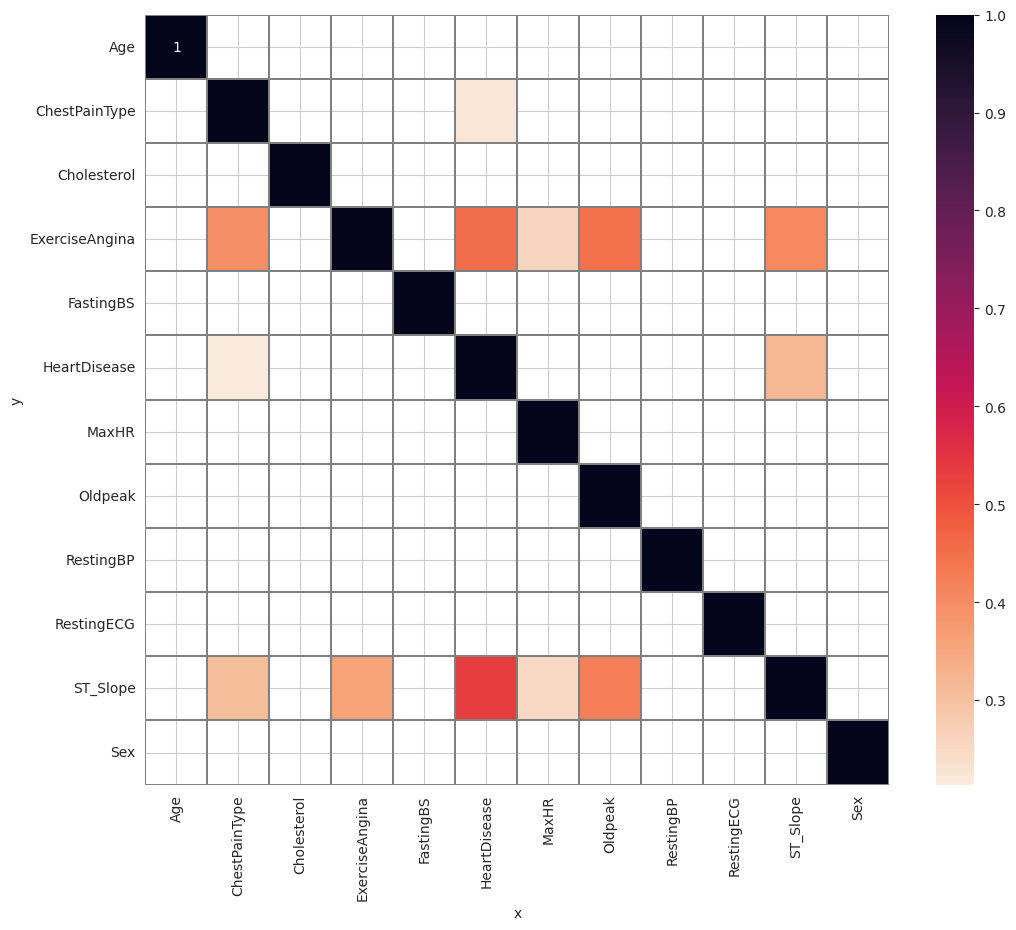

In [15]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=10)

- Both Spearman and Pearson heatmap revealed MaxHR and Oldpeak as the numerical variables which correlates the most with the target variable(HeartDisease)
- The predictive power score (PPS) instead indentified ST_slope, ExerciseAngina, and ChestPainType as the variable which correlates the most with the Target





---

## Parallel Plot

Convert both MaxHR and Oldpeak into categorical variables to show Heart attack risk patterns in parallel plot




In [30]:
from feature_engine.discretisation import ArbitraryDiscretiser
import numpy as np

oldpeak_map = [-np.Inf, 0, 2, 4, np.Inf]
max_hr_map = [-np.Inf, 100, 120, 140, 160, 180, np.Inf]
disc = ArbitraryDiscretiser(binning_dict={'Oldpeak': oldpeak_map, 'MaxHR': max_hr_map})
df_parallel = disc.fit_transform(df_eda)
df_parallel.head()

,ST_Slope,ChestPainType,ExerciseAngina,Oldpeak,MaxHR,HeartDisease
0,Up,Atypical Angina,No Angina,0,4,No risk
1,Flat,Non Anginal Pain,No Angina,1,3,Risk
2,Up,Atypical Angina,No Angina,0,0,No risk
3,Flat,Asymptomatic,Angina,1,1,Risk
4,Up,Non Anginal Pain,No Angina,0,2,No risk


In HeartDisease map No risk as 0 and Risk as 1

In [31]:
df_parallel['HeartDisease'] = df_parallel['HeartDisease'].map({'Risk': 1, 'No risk': 0})

Change MaxHR and Olpeak bin name to make it easier to read in the parallel plot

In [35]:
def rename_bin_labels(column_name, map_name):
    n_classes = len(map_name) - 1
    classes_ranges = disc.binner_dict_[column_name][1:-1]

    labels_map = {}
    for n in range(0, n_classes):
        if n == 0:
            labels_map[n] = f"<{classes_ranges[0]}"
        elif n == n_classes-1:
            labels_map[n] = f"+{classes_ranges[-1]}"
        else:
            labels_map[n] = f"{classes_ranges[n-1]} to {classes_ranges[n]}"
    return labels_map

max_hr_labels = rename_bin_labels('MaxHR',max_hr_map)
oldpeak_labels = rename_bin_labels('Oldpeak',oldpeak_map)

Replace MaxHR and Oldpeaks labels name in the dataframe

In [36]:
df_parallel['MaxHR'] = df_parallel['MaxHR'].replace(max_hr_labels)
df_parallel['Oldpeak'] = df_parallel['Oldpeak'].replace(oldpeak_labels)
df_parallel.head()

,ST_Slope,ChestPainType,ExerciseAngina,Oldpeak,MaxHR,HeartDisease
0,Up,Atypical Angina,No Angina,<0,160 to 180,0
1,Flat,Non Anginal Pain,No Angina,0 to 2,140 to 160,1
2,Up,Atypical Angina,No Angina,<0,<100,0
3,Flat,Asymptomatic,Angina,0 to 2,100 to 120,1
4,Up,Non Anginal Pain,No Angina,<0,120 to 140,0


### Multi-dimensional categorical data plot



In [37]:
import plotly.express as px
fig = px.parallel_categories(df_parallel, color="HeartDisease")
fig.show()## Correlation and PPS Analysis


---
## Conclusions

The Spearman and Pearson cofficient identified the same top 5 variables :
- ST_Slope
- ChestPainType
- ExerciseAngina
- Oldpeak
- MaxHR

Patients with high risk of heart attack show the following phenotypes:
- Have a flat ST_Slope
- Have an asymptomatic chest pain
- Have exercise induced angina
- Have an oldpeak > 0
- Have a maximum heart rate <100, 100-120, or 120-140